# **Impacto Económico de desastres hidrológicos: Magnitud y Daños económicos (2010-2024)**

---





 **0. Conexión con Google Drive, para poder leer sus archivos almacenados y posteriormente guardar en dicha unidad aquella nueva información se genere**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Lectura de la base de datos almacenada en Google Drive, desde el periodo de tiempo específicado desde el jupyter.
import pandas as pd

bd = pd.read_excel("/content/drive/MyDrive/Base de datos/database_2010_2024.xlsx")


**1. Filtrado especifico y limpiado de las variables a relacionar entre sí: (Pre-procesado de datos)**

In [42]:
bd = bd.rename(columns = {"Start Year":"Año","Start Month":"Mes", "Start Day":"Dia", "Country":"País", "Total Damage ('000 US$)":"Daños Económicos", "Magnitude":"Magnitud", "Total Deaths":"Muertes Totales", "Disaster Subgroup":"Clasificación"})

bd.isnull().sum()

bd.drop(["Muertes Totales"], axis=1, inplace=True)  #eliminamos la "columna muerte totales" por presentar una ausencia significativa de datos y por no requerirse para este estudio.

bd = bd.dropna()

bd['Dia'] = bd['Dia'].astype(int)

bd["Fecha"] = pd.to_datetime(bd[["Año", "Mes", "Dia"]].astype(str).agg('-'.join, axis=1))

bd = bd.drop(columns=["Año", "Mes", "Dia", "Unnamed: 0"])


bd.index=range(len(bd))

bd

,País,Region,Location,Magnitud,Clasificación,Daños Económicos,Fecha
0,Mexico,Americas,"Distrito Federal, Mexico city, Michoacan provi...",122621.00,Hydrological,16000.0,2010-01-26
1,Portugal,Europe,Funchal district (Ilha Da Madera province),483.00,Hydrological,1350000.0,2010-02-20
2,Australia,Oceania,"Charleville town (Murweh district, Queensland ...",431681.00,Hydrological,109000.0,2010-02-28
3,Colombia,Americas,"Sucre, Bolivar, Cordoba, Antioquia, Atlantico,...",1140146.00,Hydrological,1000000.0,2010-04-06
4,Sri Lanka,Asia,"Galle, Matara districts (Southern province), R...",19210.00,Hydrological,105000.0,2010-05-14
...,...,...,...,...,...,...,...
187,Yemen,Asia,"Aden, Lahj, Taiz, Ad Dali’, Abyan, Hadramawt g...",18949.28,Hydrological,10000.0,2020-04-15
188,Ukraine,Europe,Verkhovyna District (Ivano-Frankivsk); Vyzhnyt...,33791.16,Hydrological,153861.0,2020-06-22
189,Japan,Asia,"Kumamoto Prefecture, Yatsushiro, and Hitoyoshi...",28547.82,Hydrological,5800000.0,2020-06-29
190,Germany,Europe,Berchtesgaden (Bavaria); Heilbronn (Baden-Würt...,8488.83,Hydrological,40000000.0,2021-07-12


**1.1 Guardado de la información del DataFrame resultante**

In [37]:
bd.to_csv("relacionmagnituddaños.csv")

**2. Estadisticas de magnitud y daños económicos 2010-2024: (Procesado de datos)**

In [44]:
pd.options.display.float_format = '{:,.2f}'.format

bd.describe()


,Magnitud,Daños Económicos,Fecha
count,192.00,192.00,192
mean,"171,198.54","1,275,746.44",2014-06-29 03:22:30
min,30.00,176.00,2010-01-26 00:00:00
25%,"20,345.51","21,500.00",2012-03-19 00:00:00
50%,"53,710.97","119,500.00",2014-01-29 00:00:00
75%,"151,867.60","590,500.00",2016-08-15 18:00:00
max,"2,643,786.00","40,000,000.00",2023-11-06 00:00:00
std,"330,251.02","4,636,715.21",NaN


In [125]:
print("Cantidad de afectaciones por país, sólo de aquellos que se les pudo filtrar \n la magnitud y daños económicos, plazo de tiempo de estudio 2010-2024\n")

print(bd['País'].value_counts())


Cantidad de afectaciones por país, sólo de aquellos que se les pudo filtrar 
 la magnitud y daños económicos, plazo de tiempo de estudio 2010-2024

País
India                               17
China                               14
Thailand                             9
Philippines                          8
Indonesia                            7
                                    ..
Sudan                                1
Romania                              1
Saint Vincent and the Grenadines     1
Burundi                              1
Yemen                                1
Name: count, Length: 71, dtype: int64


**3. Visualización e interpretación de los datos: (Análisis)**

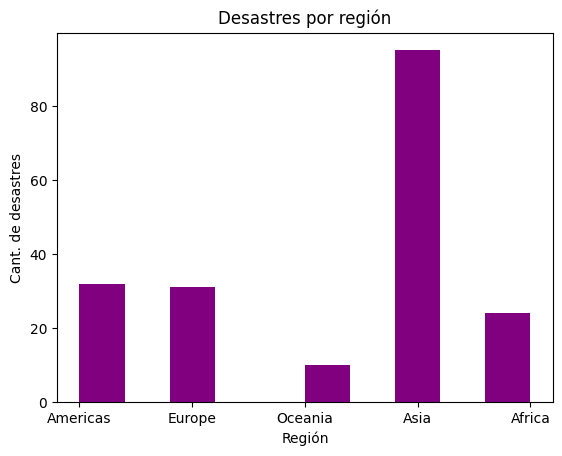

In [118]:
region = bd["Region"]
plt.hist(region, color="purple")
plt.title("Desastres por región")
plt.ylabel("Cant. de desastres")
plt.xlabel("Región")
plt.show()

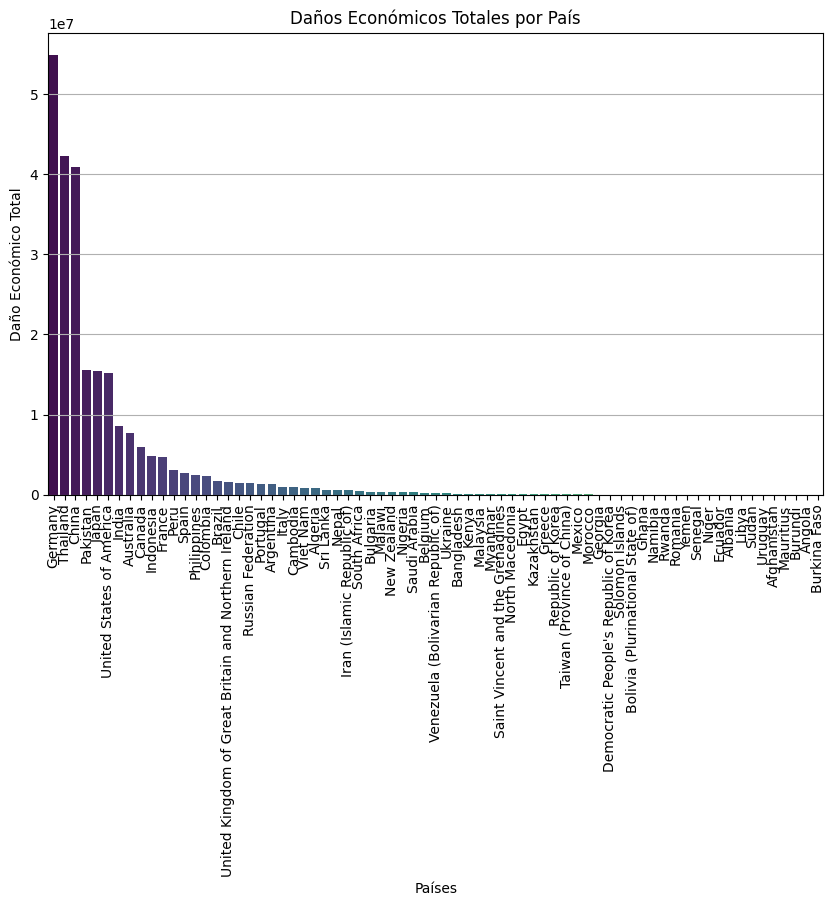

In [111]:
daños_totales = bd.groupby('País')['Daños Económicos'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='País', y='Daños Económicos', hue='País', data=daños_totales, palette='viridis', legend=False)

plt.title('Daños Económicos Totales por País')
plt.xlabel('Países')
plt.ylabel('Daño Económico Total')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

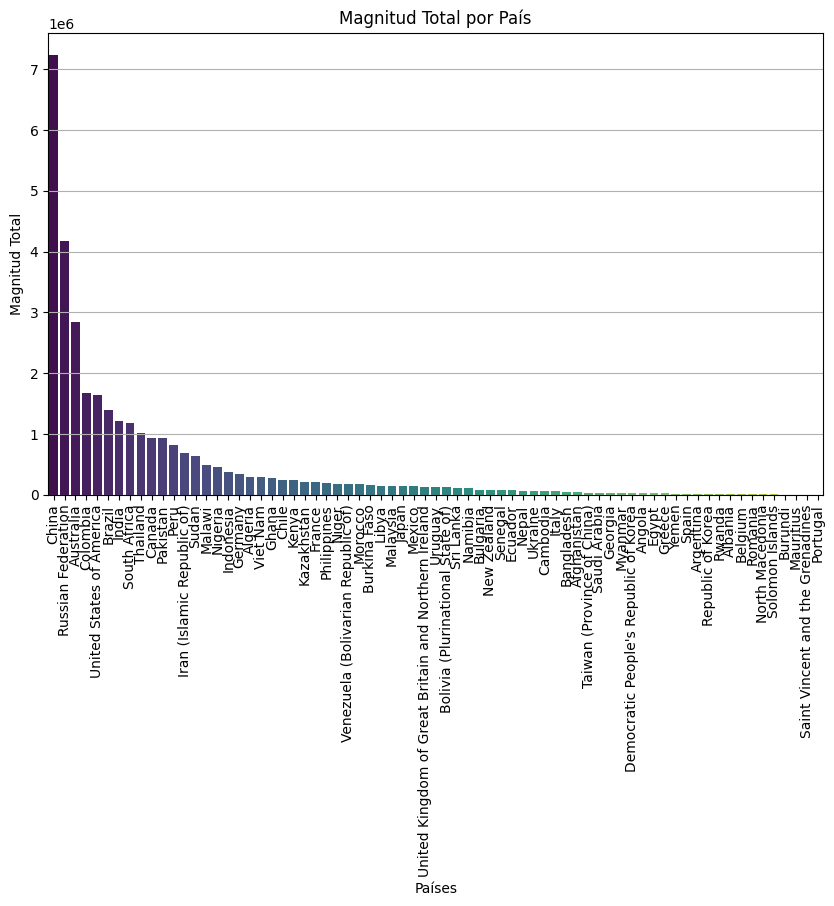

In [115]:
magnitud_total = bd.groupby('País')['Magnitud'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='País', y='Magnitud', hue='País', data=magnitud_total, palette='viridis', legend=False)

plt.title('Magnitud Total por País')
plt.xlabel('Países')
plt.ylabel('Magnitud Total')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

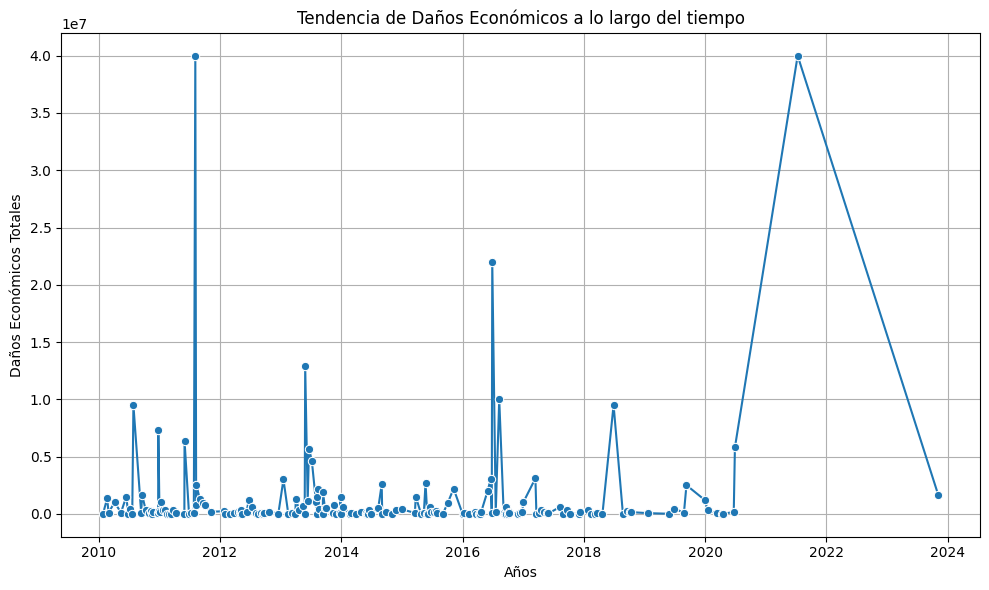

In [65]:
import seaborn as sns

# Agrupar por año y sumar los daños económicos
tendencias = bd.groupby("Fecha")["Daños Económicos"].sum().reset_index()

# Gráfico de series temporales
plt.figure(figsize=(10, 6))
sns.lineplot(data=tendencias, x='Fecha', y='Daños Económicos', marker='o')
plt.title('Tendencia de Daños Económicos a lo largo del tiempo')
plt.xlabel('Años')
plt.ylabel('Daños Económicos Totales')
plt.grid()
plt.tight_layout()
plt.show()

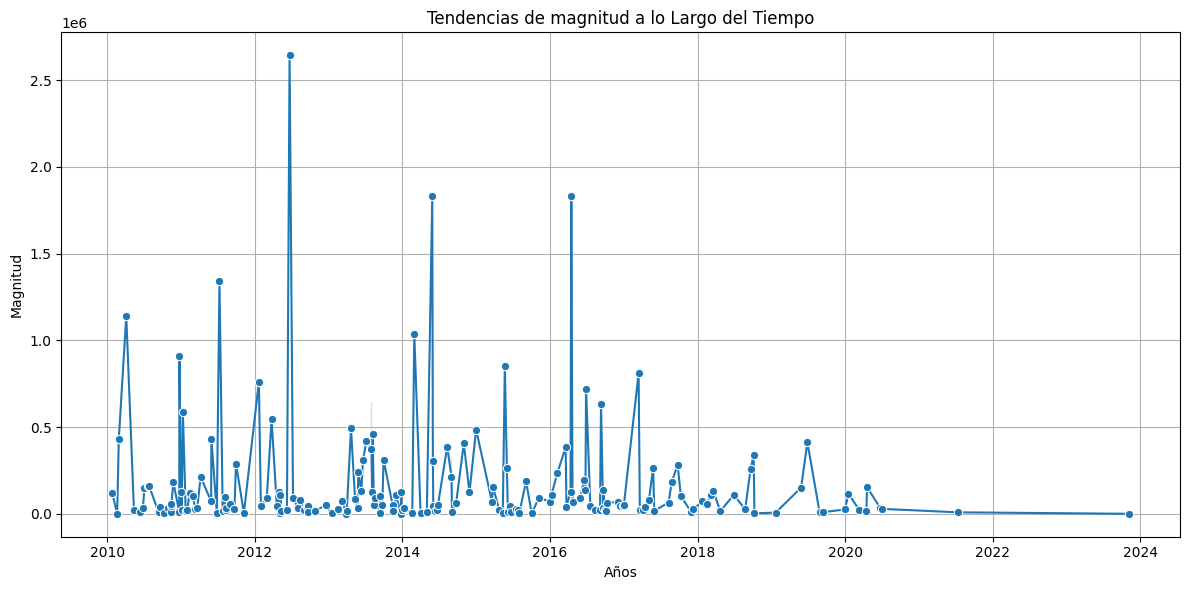

In [123]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='Magnitud', data=bd, marker='o')
plt.title('Tendencias de magnitud a lo Largo del Tiempo')
plt.xlabel('Años')
plt.ylabel('Magnitud')
plt.grid()
plt.tight_layout()
plt.show()

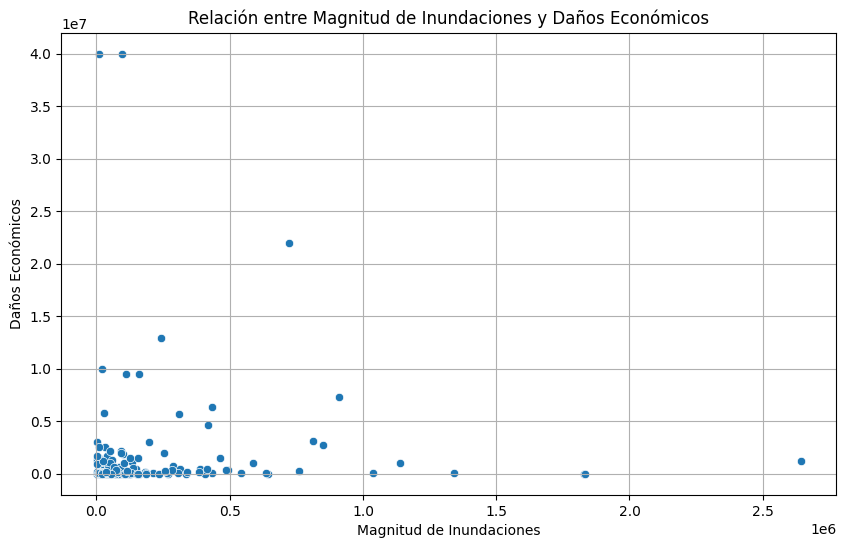

In [52]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bd, x='Magnitud', y='Daños Económicos')
plt.title('Relación entre Magnitud de Inundaciones y Daños Económicos')
plt.xlabel('Magnitud de Inundaciones')
plt.ylabel('Daños Económicos')
plt.grid()
plt.show()

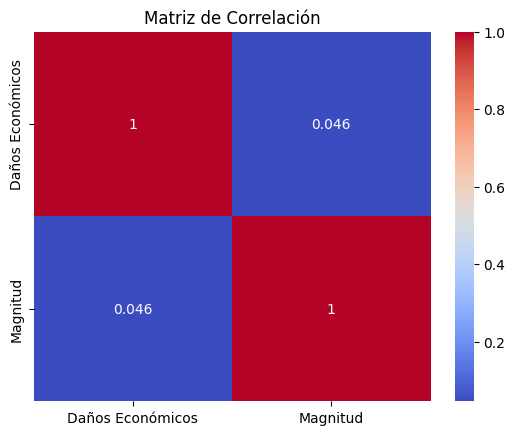

In [71]:
# Matriz de correlación
correlación = bd[['Daños Económicos', 'Magnitud']].corr()
sns.heatmap(correlación, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()